In [2]:
from ezonnx import visualize_images

### Depth Estimation with DepthAnythingV2

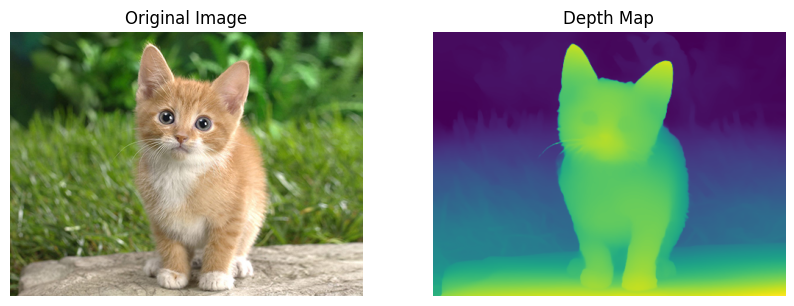

In [3]:
from ezonnx import DepthAnythingV2
depther = DepthAnythingV2(backbone="small",quantize="fp16")
res = depther("images/cat.jpg")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Depth Map"],
                    [res.original_img[...,::-1],res.processed_img])


### Background removal with RMBG1.4

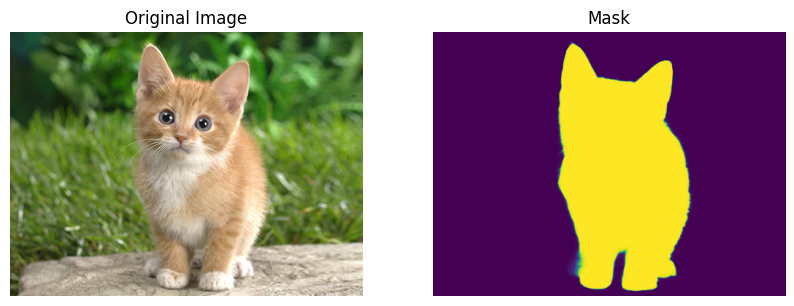

In [4]:
from ezonnx import RMBG14
rmbg = RMBG14(quantize="quantized")
res = rmbg("images/cat.jpg")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Mask"],
                    [res.original_img[...,::-1],res.processed_img])

### Image inpainting with LaMa

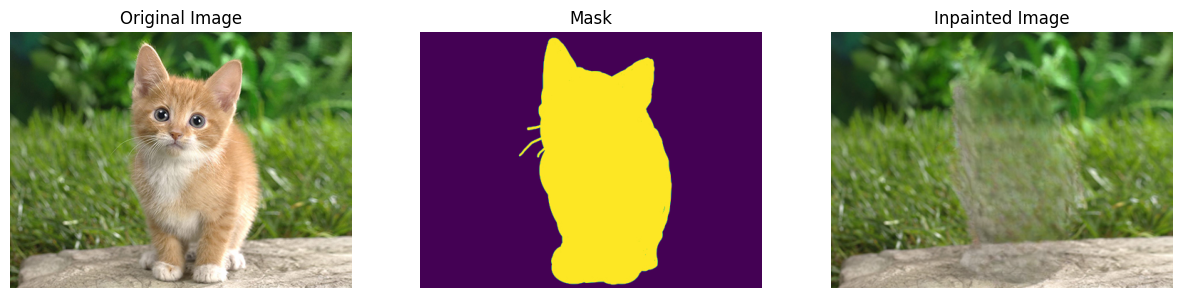

In [5]:
from ezonnx import LaMa
lama = LaMa()
result = lama("images/cat.jpg","images/cat_mask.png")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Mask","Inpainted Image"],
                    [result.original_img[...,::-1],result.mask,result.processed_img])

Optical flow estimation with NeuFlowV2

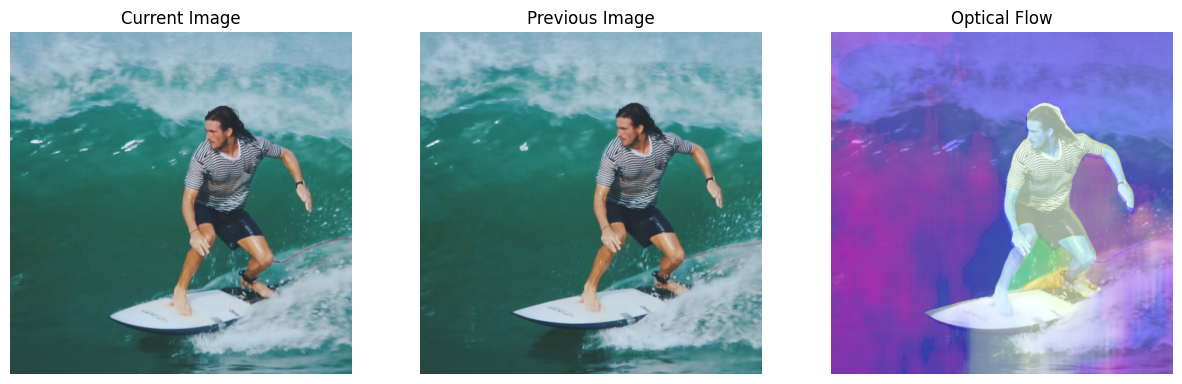

In [6]:
from ezonnx import NeuFlowV2, visualize_images
neuflow = NeuFlowV2("things")
output = neuflow("images/surf_next.jpg","images/surf.jpg")  
visualize_images(["Current Image","Previous Image","Optical Flow"],
                    [output.original_img[...,::-1],
                    output.previous_img[...,::-1],
                    output.visualized_img])